In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('pima-indian-diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  DiabetesPresence  
0                     0.627   50                 1  
1                     0.351   31                 0  
2                     0.672   32                 1  
3                     0.167   21                 0  
4                     2.288   33                 1

In [35]:
X = df.loc[:, df.columns != 'DiabetesPresence']
Y = df.loc[:, 'DiabetesPresence']

In [36]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model.fit(X, Y, epochs=100)

Epoch 1/100


24/24 [==============================] - 0s 1ms/step - loss: 2.6575 - accuracy: 0.5716
Epoch 2/100
24/24 [==============================] - 0s 871us/step - loss: 1.0495 - accuracy: 0.6146
Epoch 3/100
24/24 [==============================] - 0s 870us/step - loss: 0.8291 - accuracy: 0.6523
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7532 - accuracy: 0.6641
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7188 - accuracy: 0.6693
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7024 - accuracy: 0.6693
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.6667
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.6771
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.6680
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.6784
Epoch 11/100
24/2

In [40]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy * 100))

24/24 [==============================] - 0s 1ms/step - loss: 0.5727 - accuracy: 0.7383
Accuracy: 73.83


In [41]:
##Premièrement, on prend aléatoirement dans notre dataset 80% des lignes. Puis, nous prenons les lignes restantes pour les données d’évaluation.

In [42]:
df_train = df.sample(frac=0.8)
df_test = df.drop(df_train.index)

In [43]:
df_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
701            6      125             78             31        0  27.6   
696            3      169             74             19      125  29.9   
137            0       93             60             25       92  28.7   
46             1      146             56              0        0  29.7   
549            4      189            110             31        0  28.5   

     DiabetesPedigreeFunction  Age  DiabetesPresence  
701                     0.565   49                 1  
696                     0.268   31                 1  
137                     0.532   22                 0  
46                      0.564   29                 0  
549                     0.680   37                 0

In [44]:
##À partir de ces données, on peut créer les X features et Y target. Le processus est le même que dans la première partie

In [45]:
X_train = df_train.loc[:, df.columns != 'DiabetesPresence']
Y_train = df_train.loc[:, 'DiabetesPresence']
X_test = df_test.loc[:, df.columns != 'DiabetesPresence']
Y_test = df_test.loc[:, 'DiabetesPresence']

In [46]:
##Modèle
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

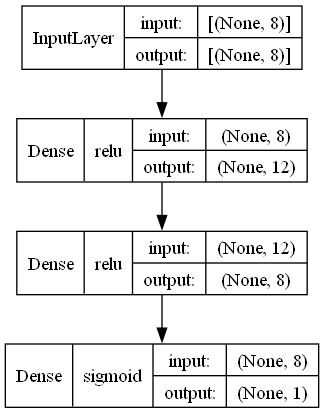

In [47]:
##Le diagramme d’un Réseau de Neurones nous permet de mieux comprendre sa structure. Pour cela on utiliser la fonction plot_model
from keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=False, show_layer_activations=True)

In [48]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
50/50 [==============================] - 1s 4ms/step - loss: 16.4275 - accuracy: 0.3381 - val_loss: 3.8193 - val_accuracy: 0.3740
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 2.3319 - accuracy: 0.4827 - val_loss: 1.5664 - val_accuracy: 0.5122
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 1.6368 - accuracy: 0.5031 - val_loss: 1.1912 - val_accuracy: 0.6016
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 1.2921 - accuracy: 0.5418 - val_loss: 1.0696 - val_accuracy: 0.5854
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 1.1797 - accuracy: 0.5927 - val_loss: 1.2291 - val_accuracy: 0.6341
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 1.1066 - accuracy: 0.6151 - val_loss: 1.0104 - val_accuracy: 0.6098
Epoch 7/50
50/50 [==============================] - 0s 1ms/step - loss: 0.9625 - accuracy: 0.6232 - val_loss: 0.9001 - val_accuracy: 0.5772
Epoch 8/50
50/50 [=

In [50]:
##Analyse
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], color='#066b8b')
plt.plot(history.history['val_accuracy'], color='#b39200')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [51]:
##Predictions sur des nouvelles données: On peut réutiliser notre modèle pour lui faire prédire la présence de diabète sur de nouvelles données:Utilisation de la fonction predict
predictions = model.predict(X_test)
##Modifions le résultat de ces prédiction pour avoir uniquement des 0 et 1 
predictions = (model.predict(X_test) > 0.5).astype(int)

5/5 [==============================] - 0s 997us/step


In [52]:
##afficher les premieres prédictions et les comparer aux résultats attendu :
for i in range(5):
    print('%s => Prédit : %d,  Attendu : %d' % (X_test.iloc[i].tolist(), predictions[i], Y_test.iloc[i]))

[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => Prédit : 0,  Attendu : 0
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => Prédit : 1,  Attendu : 0
[1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0] => Prédit : 0,  Attendu : 1
[7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0] => Prédit : 1,  Attendu : 1
[1.0, 115.0, 70.0, 30.0, 96.0, 34.6, 0.529, 32.0] => Prédit : 0,  Attendu : 1


C:\Users\NICOLAS.LEYMARIE\AppData\Local\Temp\ipykernel_18040\331429759.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => Prédit : %d,  Attendu : %d' % (X_test.iloc[i].tolist(), predictions[i], Y_test.iloc[i]))


In [53]:
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy * 100))

5/5 [==============================] - 0s 1ms/step - loss: 0.6111 - accuracy: 0.7208
Accuracy: 72.08


# Prediction du diabete avec un modele de classification de sklearn KNeighborsClassifier

In [54]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  DiabetesPresence  
0                     0.627   50                 1  
1                     0.351   31                 0  
2                     0.672   32                 1  
3                     0.167   21                 0  
4                     2.288   33                 1

In [55]:
##On va utiliser un modele de classification de sklearn
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [56]:
model = KNeighborsClassifier()

In [57]:
##Il nous faut 2 tableaux X et y. y correspondand aux diabetique et x un tableau avec toute les autres variables

In [58]:
yd = df['DiabetesPresence']
Xd = df.drop('DiabetesPresence', axis=1)

In [59]:
model.fit(Xd, yd)
model.score(Xd, yd)

0.8033854166666666

In [60]:
model.predict(Xd)

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [61]:
##Fonction de prediction du diabete
def diabete(model, Pregnancies=3, Glucose=0, BloodPressure=44, SkinThickness=35, Insulin=94, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=56):
    x = np.array([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction,
                  Age]).reshape(1, 8)  ##reshape permet de créer un tableau a 2 dimension avec 1 ligne et 8 colonnes
    print(model.predict(x))
    print(model.predict_proba(x))  ##j'ai 80% de chance d"appartenir à la classe 0 (pas de diabete)

In [62]:
diabete(model)

[0]
[[0.8 0.2]]


c:\Users\NICOLAS.LEYMARIE\Projets\diabete-prediction\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\NICOLAS.LEYMARIE\Projets\diabete-prediction\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
